In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot a
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# feel free to add more if you need

ModuleNotFoundError: No module named 'yellowbrick'

###Examine the data and construct relevant features
Reduce the dimensionality of the features through principal component analysis, making sure to justify the number of principal components used

Create clusters based on the principal components (not the original features), justifying how many clusters you create; do not use the response to the campaign for clustering

Examine how the clusters differ in their purchase behavior and response to the campaign. Also, examine how the different customer clusters react to discounts.

Suppose you had limited the campaign to specific clusters. Can you calculate the total profit for each cluster, the profit per customer in that cluster (as a measure of profitability), and the percentage of your customer base represented by that cluster (as a measure of reach)?

Create a predictive model that predicts the total purchases made by a customer for a campaign like this. Create a decision rule based on the predictive model that would select only specific customers to be targeted by the campaign.

Calculate the total profit based on your decision rule in the test sample, the profit per invited customer, and the percentage of customers invited. Compare these statistics to a selection based on clustering from 5).

In [1]:
!pip install yellowbrick


zsh:1: command not found: pip


Read Data

In [ ]:
data = pd.read_csv("/Users/Patron/Documents/Machine Learning /Assignment 4/HW4_data.csv", delimiter="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# prompt: #How many rows and columns are in my data


# Get the number of rows and columns
num_rows = len(data)
num_cols = len(data.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 2216
Number of columns: 30


Data Description

1. Customor Information: <br>
<br>
ID: Customer's unique identifier <br>
Year_Birth: Customer's birth year <br>
Education: Customer's education level <br>
Marital_Status: Customer's marital status <br>
Income: Customer's yearly household income <br>
Kidhome: Number of children in customer's household <br>
Teenhome: Number of teenagers in customer's household <br>
Dt_Customer: Date of customer's enrollment with the company <br>
Recency: Number of days since customer's last purchase <br>
Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

2. Product Information <br>
<br>
MntWines: Amount spent on wine in last 2 years <br>
MntFruits: Amount spent on fruits in last 2 years <br>
MntMeatProducts: Amount spent on meat in last 2 years <br>
MntFishProducts: Amount spent on fish in last 2 years <br>
MntSweetProducts: Amount spent on sweets in last 2 years <br>
MntGoldProds: Amount spent on gold in last 2 years

3. Promotion Information: <br>
<br>
NumDealsPurchases: Number of purchases made with a discount <br>
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

4. Channel Information: <br>
<br>
NumWebPurchases: Number of purchases made through the company’s website <br>
NumCatalogPurchases: Number of purchases made using a catalogue <br>
NumStorePurchases: Number of purchases made directly in stores <br>
NumWebVisitsMonth: Number of visits to company’s website in the last month

A quick check on the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations: <br>
1. missing values found in income
2. Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
3. There are some categorical features in our data, will need to encode them.

In [ ]:
# Remove missing values
# since there are only a very small portion of data that is missing, we can simply remove them, but you are welcome to use other treatments.
data = data.dropna()
print("The total number of data points after removing the rows with missing values are:", len(data))

The total number of data points after removing the rows with missing values are: 2216


In [ ]:
# Convert Dt_Customer to DateTime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

# Store the new data in "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [ ]:
# A quick check on the distribution of levels in categorical variables
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [ ]:
# Rename the 'Response' column to 'AcceptedCmp6'
data = data.rename(columns={'Response': 'AcceptedCmp6'})

In [ ]:
# Separate features and target variable
# Exclude 'Dt_Customer' and 'ID' from features
features = data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'Dt_Customer'])
target = data['AcceptedCmp6']

# Convert categorical features to numerical using Label Encoding
categorical_cols = ['Education', 'Marital_Status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = features.select_dtypes(include=np.number).columns
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])


# Apply PCA
pca = PCA()
pca.fit(features)

# Determine the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components explaining at least 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of principal components to retain: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])

Number of principal components to retain: 17


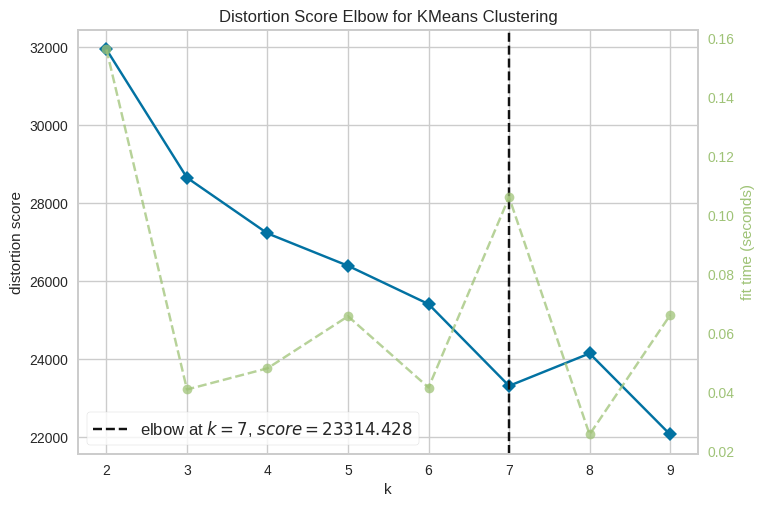

Optimal number of clusters (k): 7


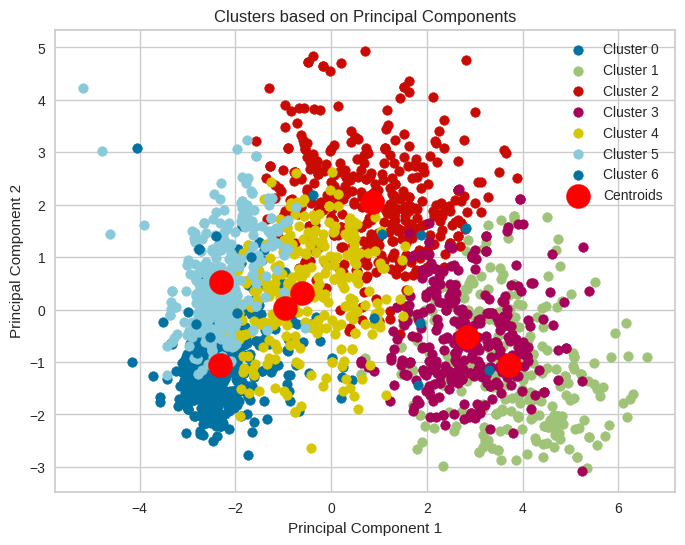

In [ ]:
# prompt: Create clusters based on the principal components (not the original features), justifying how many clusters you create; do not use the response to the campaign for clustering

# Use the Elbow method to find the optimal number of clusters
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(principal_df)
visualizer.show()
plt.show()

# Based on the Elbow method's output, choose the optimal k (number of clusters)
optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters (k): {optimal_k}")

# Apply KMeans clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(principal_df)

# Add cluster labels to the dataframe
principal_df['cluster'] = cluster_labels

# Analyze the clusters (example: visualize the clusters in the PCA space)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(principal_df[principal_df['cluster'] == cluster]['PC1'],
                principal_df[principal_df['cluster'] == cluster]['PC2'],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on Principal Components')
plt.legend()
plt.show()


Cluster 0:
         MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  556.000000  556.000000       556.000000       556.000000   
mean    31.487410    6.226619        25.384892         9.381295   
std     50.023506    8.831908        29.698959        13.879479   
min      0.000000    0.000000         0.000000         0.000000   
25%      5.000000    1.000000         8.000000         2.000000   
50%     12.000000    3.000000        15.000000         4.000000   
75%     32.250000    7.000000        27.000000        12.000000   
max    391.000000   64.000000       206.000000       179.000000   

       MntSweetProducts  MntGoldProds  
count        556.000000    556.000000  
mean           6.384892     16.654676  
std            8.570180     21.212766  
min            0.000000      0.000000  
25%            1.000000      5.000000  
50%            3.500000     11.000000  
75%            8.000000     20.000000  
max           78.000000    262.000000  
Campaign Acceptance Rate

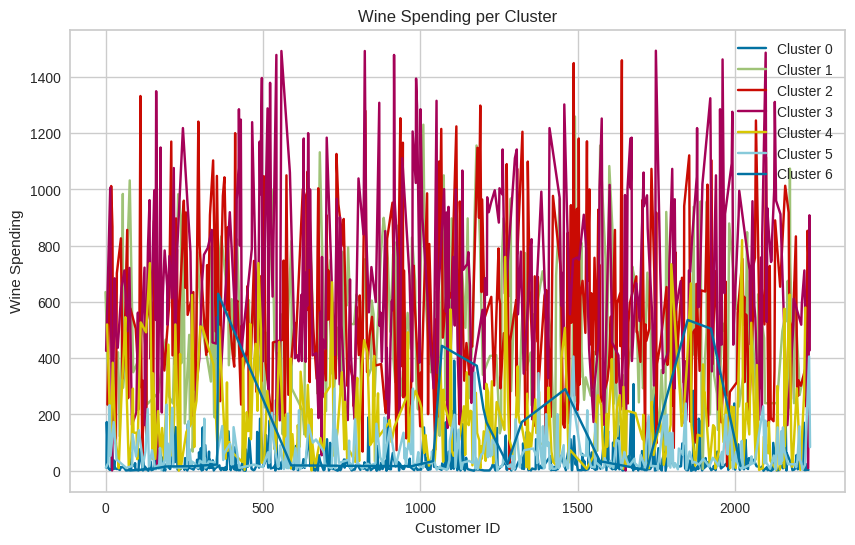


Cluster 0 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: 0.42952910321803306

Cluster 1 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: -0.25692993360792354

Cluster 2 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: -0.13414124018901644

Cluster 3 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: -0.013323754475917625

Cluster 4 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: 0.345479493763354

Cluster 5 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: 0.627590742932549

Cluster 6 Discount Sensitivity:
Correlation between NumDealsPurchases and total spending: 0.07481885106515895


In [ ]:
# prompt: # prompt: Examine how the clusters differ in their purchase behavior and response to the campaign. Also, examine how the different customer clusters react to discounts.

# Examine how the clusters differ in their purchase behavior and response to the campaign.
# Also, examine how the different customer clusters react to discounts.

# Add cluster labels to the original dataframe
data['cluster'] = cluster_labels

# Analyze purchase behavior by cluster
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    cluster_data = data[data['cluster'] == cluster]
    print(cluster_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe())
    print(f"Campaign Acceptance Rate: {cluster_data['AcceptedCmp6'].mean()}") # Response to the last campaign
    print(f"Discount Usage Rate (NumDealsPurchases): {cluster_data['NumDealsPurchases'].mean()}")

# More detailed analysis (example: visualize spending habits)
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    plt.plot(cluster_data['MntWines'], label=f"Cluster {cluster}")
plt.xlabel("Customer ID")
plt.ylabel("Wine Spending")
plt.title("Wine Spending per Cluster")
plt.legend()
plt.show()

# ... similar visualizations or statistical tests for other spending categories.


# Examine discount sensitivity
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Discount Sensitivity:")
    cluster_data = data[data['cluster'] == cluster]
    # Analyze relationship between NumDealsPurchases and other features.
    # Calculate correlation, perform statistical tests (e.g., ANOVA), or create visualizations.

    # Example: Calculate the correlation between NumDealsPurchases and total spending
    total_spending = cluster_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
    correlation = cluster_data['NumDealsPurchases'].corr(total_spending)
    print(f"Correlation between NumDealsPurchases and total spending: {correlation}")

    # ... other relevant analyses (e.g., visualize the distribution of NumDealsPurchases)

In [ ]:
# prompt: Suppose you had limited the campaign to specific clusters. Can you calculate the total profit for each cluster, the profit per customer in that cluster (as a measure of profitability), and the percentage of your customer base represented by that cluster (as a measure of reach)?

# Assuming 'data' dataframe with 'cluster', 'AcceptedCmp6' (campaign response), and spending columns exists

# Calculate profit (example: assuming profit is 10% of total spending)
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
data['Profit'] = data['Total_Spending'] * 0.1  # Replace 0.1 with your actual profit margin

# Calculate total profit, profit per customer, and customer base percentage for each cluster
cluster_profit = data.groupby('cluster')['Profit'].sum()
cluster_size = data.groupby('cluster')['ID'].count()
cluster_profit_per_customer = cluster_profit / cluster_size
cluster_customer_percentage = (cluster_size / len(data)) * 100


print("Cluster Analysis:")
print("------------------")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(f"  Total Profit: {cluster_profit[cluster]:.2f}")
    print(f"  Profit per Customer: {cluster_profit_per_customer[cluster]:.2f}")
    print(f"  Customer Base Percentage: {cluster_customer_percentage[cluster]:.2f}%")

Cluster Analysis:
------------------

Cluster 0:
  Total Profit: 33355.90
  Profit per Customer: 60.76
  Customer Base Percentage: 24.77%

Cluster 1:
  Total Profit: 16258.40
  Profit per Customer: 57.65
  Customer Base Percentage: 12.73%

Cluster 2:
  Total Profit: 24303.00
  Profit per Customer: 65.16
  Customer Base Percentage: 16.83%

Cluster 3:
  Total Profit: 18586.40
  Profit per Customer: 58.45
  Customer Base Percentage: 14.35%

Cluster 4:
  Total Profit: 20359.00
  Profit per Customer: 64.43
  Customer Base Percentage: 14.26%

Cluster 5:
  Total Profit: 19498.90
  Profit per Customer: 58.38
  Customer Base Percentage: 15.07%

Cluster 6:
  Total Profit: 1021.10
  Profit per Customer: 48.62
  Customer Base Percentage: 0.95%
